In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import joblib

from fit2d.analysis.emcee import get_sampler_statistics, plot_walker_paths, plot_posterior_distributions

with open("sampler_27-Aug-2020.pkl", "rb") as f:
    sampler = joblib.load(f)

    

/home/anna/anaconda3/envs/little/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# min_iter / max_iter: can use to limit the iterations used to calculate values

get_sampler_statistics(sampler, min_iter=2, max_iter=3)

{'param_0': {'mean': 93.66655356255475, 'stddev': 48.10106303560913},
 'param_1': {'mean': 100.35102273596428, 'stddev': 47.584546269478935}}

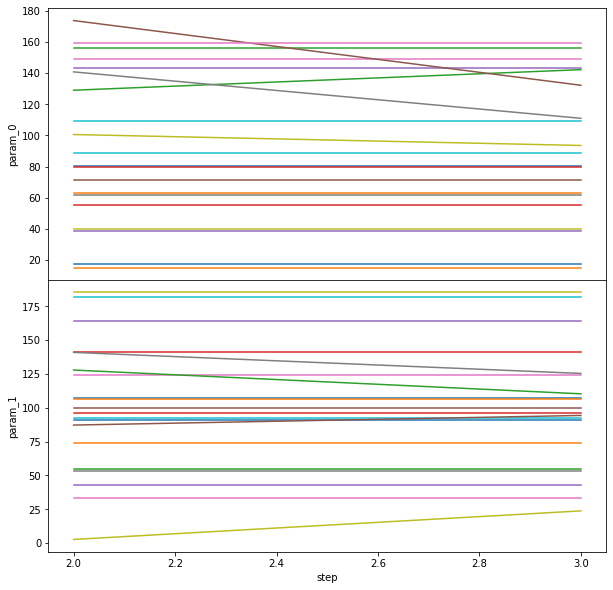

In [6]:
# param_names =  optional list of parameter names, in same order as when fit. Can leave as None.
# min_iter / max_iter: can use to limit the iterations shown in chain

walker_paths_figure = plot_walker_paths(sampler, param_names=None, min_iter=2, max_iter=4)

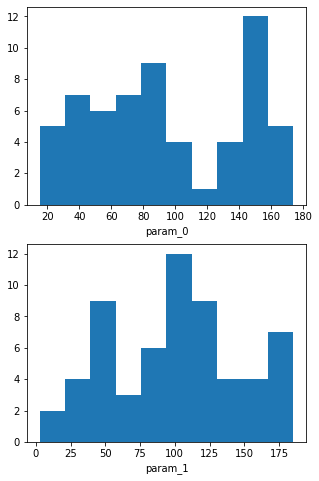

In [7]:
posterior_distriubtion_figures = plot_posterior_distributions(
        sampler, min_iter=1, max_iter=None)